In [1]:
import pandas as pd
import numpy as np
import os

file_locations = {
    'tpch': ['customer/orders_customer_optimal_rep.csv', 'orders/customer_orders_optimal_rep.csv', 
             'orders/lineitem_orders_optimal_rep.csv', 'part/lineitem_part_optimal_rep.csv', 
             'part/partsupp_part_optimal_rep.csv', 'partsupp/lineitem_partsupp_optimal_rep.csv', 
             'partsupp/part_partsupp_optimal_rep.csv', 'partsupp/supplier_partsupp_optimal_rep.csv', 
             'supplier/lineitem_supplier_optimal_rep.csv', 'supplier/partsupp_supplier_optimal_rep.csv'],
    'imdb': ['cast_info/title_cast_info_optimal_rep.csv',
             'movie_companies/title_movie_companies_optimal_rep.csv', 'movie_info/title_movie_info_optimal_rep.csv', 
             'movie_info_idx/title_movie_info_idx_optimal_rep.csv', 'movie_keyword/title_movie_keyword_optimal_rep.csv',
             'title/cast_info_title_optimal_rep.csv', 'title/movie_companies_title_optimal_rep.csv',
             'title/movie_info_idx_title_optimal_rep.csv', 'title/movie_info_title_optimal_rep.csv',
             'title/movie_keyword_title_optimal_rep.csv'
            ],
    'ssb': ['customer/lineorder_customer_optimal_rep.csv', 'ddate/lineorder_ddate_optimal_rep.csv', 
           'part/lineorder_part_optimal_rep.csv', 'supplier/lineorder_supplier_optimal_rep.csv'
           ]
}


datasets = ['ssb', 'tpch', 'imdb']



dfs = []


for d in datasets:
    for f in file_locations[d]:
        dfs.append(pd.read_csv(os.path.join("../data/", d, f)))

ds = pd.concat(dfs)
ds



,left_cardinality,left_cardinality_ratio,base_cardinality,selectivity_on_indexed_attr,left_ordered,base_ordered,result_size,sel_on_indexed_attr_with_join_predicate,hj_idx_cost,hj_seq_cost,nl_idx_cost,nl_seq_cost,mj_idx_cost,mj_seq_cost,optimal_decision
0,10800,0.360000,30000,0.908900,0,1,9816,0.454467,3078.65,2821.50,5701.00,4.418208e+06,2197.32,3906.91,4
1,3265,0.108833,30000,0.671800,0,1,2193,0.335900,1188.48,1172.10,3383.99,9.879785e+05,1207.18,2656.47,1
2,4860,0.162000,30000,0.562533,0,1,2734,0.281267,1002.33,1142.52,3874.45,1.231189e+06,1170.05,2504.54,0
3,7892,0.263067,30000,0.692467,0,1,5465,0.346233,1237.22,1229.92,4806.79,2.460164e+06,1613.73,3084.59,1
4,5875,0.195833,30000,0.308067,0,1,1810,0.154033,557.97,1041.66,4186.57,8.153604e+05,865.39,1956.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,249337,0.098618,2528312,0.481484,1,1,120056,0.240742,110942.47,123540.02,292249.65,8.607989e+09,89437.53,352096.40,4
1996,630771,0.249483,2528312,0.852889,1,1,537998,0.426444,198809.96,173656.13,463894.95,3.857394e+10,187256.88,610160.72,1
1997,314278,0.124303,2528312,0.956698,1,1,300681,0.478349,217297.85,176963.25,321473.10,2.155971e+10,157455.99,624699.01,4
1998,778601,0.307953,2528312,0.788704,1,1,614109,0.394352,186692.35,170107.88,530418.45,4.403258e+10,199352.37,594840.84,1


In [2]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
m_regression_model = MLPRegressor
m_classification_model = MLPClassifier

# Classification Task

In [27]:
all_features = ['left_cardinality', 'base_cardinality',
       'selectivity_on_indexed_attr', 'left_ordered', 'base_ordered',
       'result_size', 'sel_on_indexed_attr_with_join_predicate']

key_features = ['left_cardinality', 'base_cardinality', 'selectivity_on_indexed_attr'] #  'result_size']

features = key_features

regression_targets = ['hj_idx_cost', 'hj_seq_cost', 'nl_idx_cost', 'nl_seq_cost', 'mj_idx_cost', 'mj_seq_cost']
classification_target = ['optimal_decision']


X = ds[features]
y = ds['optimal_decision']

from sklearn.model_selection import train_test_split
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = m_classification_model(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=500).fit(X_train, y_train)

acc = np.sum(clf.predict(X_test) == y_test) / len(y_test)
print(f"Test accuracy: %.2f%%" % (acc * 100))

Test accuracy: 95.29%


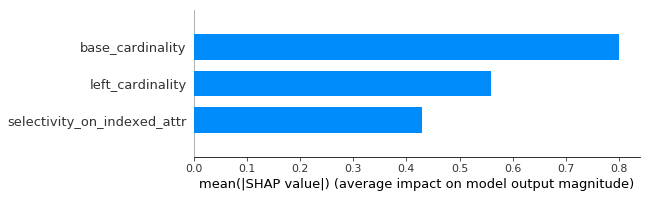

In [29]:
import shap

x_ds_train = pd.DataFrame(data=X_train[0:100], columns=features)

explainer = shap.KernelExplainer(clf.predict, x_ds_train)
shap_values = explainer.shap_values(x_ds_train, nsamples=100)
shap.summary_plot(shap_values, x_ds_train, plot_type="bar")

# Regression Task

In [30]:
# Collect all the regressors
regressors = {}


all_features = ['left_cardinality', 'base_cardinality',
       'selectivity_on_indexed_attr', 'left_ordered', 'base_ordered',
       'result_size', 'sel_on_indexed_attr_with_join_predicate']

key_features = ['left_cardinality', 'base_cardinality', 'selectivity_on_indexed_attr'] #  'result_size']

features = key_features

regression_targets = ['hj_idx_cost', 'hj_seq_cost', 'nl_idx_cost', 'nl_seq_cost','mj_idx_cost', 'mj_seq_cost']
classification_target = ['optimal_decision']


X = ds[features]
y = ds[regression_targets + classification_target]

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


### Hash join + index scan

In [31]:
c_y_train = y_train['hj_idx_cost']
c_y_test = y_test['hj_idx_cost']

In [32]:
rgr = m_regression_model(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=300).fit(X_train, c_y_train)
regressors['hj_idx_cost'] = rgr

In [33]:
loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 665.5134462947252%


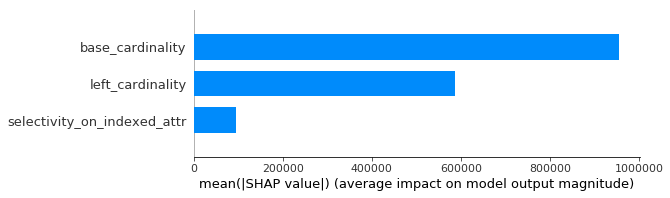

In [34]:
import shap

x_ds_train = pd.DataFrame(data=X_train[0:100], columns=features)

explainer = shap.KernelExplainer(rgr.predict, x_ds_train)
shap_values = explainer.shap_values(x_ds_train, nsamples=100)
shap.summary_plot(shap_values, x_ds_train, plot_type="bar")

### Hash join + seq scan

In [35]:
c_y_train = y_train['hj_seq_cost']
c_y_test = y_test['hj_seq_cost']

In [36]:
rgr = m_regression_model(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=300).fit(X_train, c_y_train)
regressors['hj_seq_cost'] = rgr
loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 120.1753522606724%


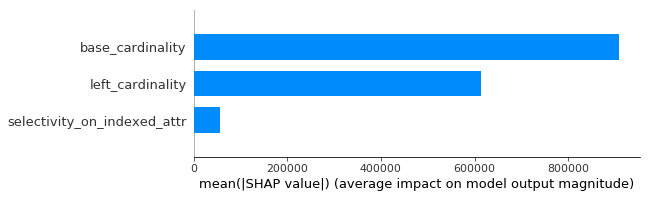

In [37]:
import shap

x_ds_train = pd.DataFrame(data=X_train[0:100], columns=features)

explainer = shap.KernelExplainer(rgr.predict, x_ds_train)
shap_values = explainer.shap_values(x_ds_train, nsamples=100)
shap.summary_plot(shap_values, x_ds_train, plot_type="bar")

### Nested loop + idx scan

In [38]:
c_y_train = y_train['nl_idx_cost']
c_y_test = y_test['nl_idx_cost']

In [39]:
rgr = m_regression_model(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=300).fit(X_train, c_y_train)
regressors['nl_idx_cost'] = rgr
loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 23400909.89608729%


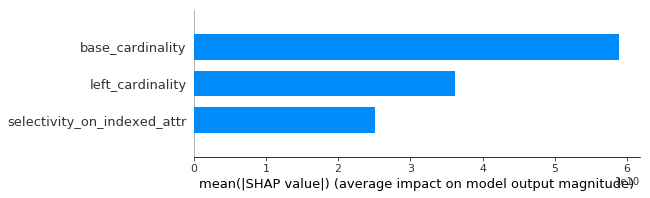

In [40]:
import shap

x_ds_train = pd.DataFrame(data=X_train[0:100], columns=features)

explainer = shap.KernelExplainer(rgr.predict, x_ds_train)
shap_values = explainer.shap_values(x_ds_train, nsamples=100)
shap.summary_plot(shap_values, x_ds_train, plot_type="bar")

### nested loop + seq scan

In [41]:
c_y_train = y_train['nl_seq_cost']
c_y_test = y_test['nl_seq_cost']

In [42]:
rgr = m_regression_model(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=300).fit(X_train, c_y_train)
regressors['nl_seq_cost'] = rgr
loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 4646876.8060089%


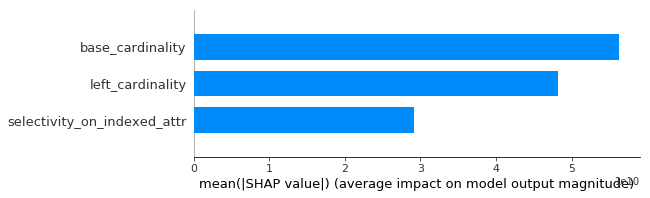

In [43]:
import shap

x_ds_train = pd.DataFrame(data=X_train[0:100], columns=features)

explainer = shap.KernelExplainer(rgr.predict, x_ds_train)
shap_values = explainer.shap_values(x_ds_train, nsamples=100)
shap.summary_plot(shap_values, x_ds_train, plot_type="bar")

### merge join + index scan

In [44]:
c_y_train = y_train['mj_idx_cost']
c_y_test = y_test['mj_idx_cost']

In [45]:
from sklearn.ensemble import RandomForestRegressor
rgr = m_regression_model(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=300).fit(X_train, c_y_train)
regressors['mj_idx_cost'] = rgr

loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 120.40055576942666%


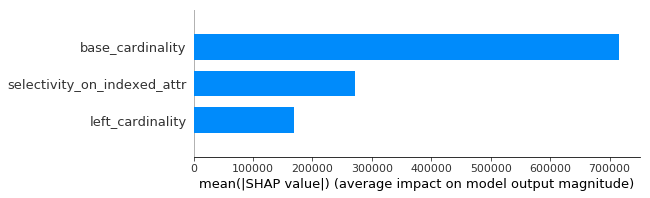

In [46]:
import shap

x_ds_train = pd.DataFrame(data=X_train[0:100], columns=features)

explainer = shap.KernelExplainer(rgr.predict, x_ds_train)
shap_values = explainer.shap_values(x_ds_train, nsamples=100)
shap.summary_plot(shap_values, x_ds_train, plot_type="bar")

### merge join + seq scan

In [47]:
c_y_train = y_train['mj_seq_cost']
c_y_test = y_test['mj_seq_cost']

In [48]:
from sklearn.ensemble import RandomForestRegressor
rgr = m_regression_model(hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=300).fit(X_train, c_y_train)
regressors['mj_seq_cost'] = rgr

loss_in_percentage = np.average(np.abs(rgr.predict(X_test) - c_y_test) / c_y_test)
print(f"Loss in percentage: +- {loss_in_percentage * 100}%")

Loss in percentage: +- 90.17427139421586%


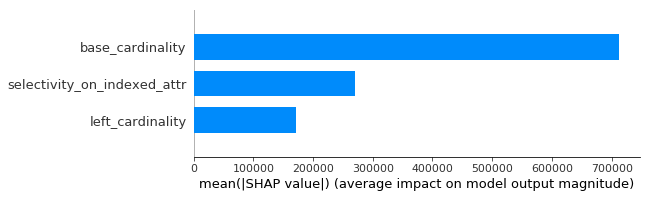

In [49]:
import shap

x_ds_train = pd.DataFrame(data=X_train[0:100], columns=features)

explainer = shap.KernelExplainer(rgr.predict, x_ds_train)
shap_values = explainer.shap_values(x_ds_train, nsamples=100)
shap.summary_plot(shap_values, x_ds_train, plot_type="bar")


# Use Regression model to do classification

In [50]:
predict_test = []
operators = ['hj_idx_cost', 'hj_seq_cost', 'nl_idx_cost', 'nl_seq_cost','mj_idx_cost', 'mj_seq_cost']

for op_idx, op in enumerate(operators) :
    predict_test.append(regressors[op].predict(X_test))
    
results = np.stack(predict_test, axis=1)
acc = np.sum(np.argmin(results, axis=1).reshape(-1,1).flatten() == y_test['optimal_decision'].to_numpy().flatten()) / len(y_test)
print("Test accuracy using all learned costs: %.2f%%" % (acc*100))

Test accuracy using all learned costs: 59.39%
